# Clasificación por regresión logística

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

sc = StandardScaler()
df = pd.read_csv('lego_data.csv',sep=',',header=None)

y=df[df.columns[-1]].values # columna de etiquetas 

X = df.iloc[:, 0:64]  #columnas de características
X = X.values

X_scaled = sc.fit_transform(X)

In [ ]:
# dividir en train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#normalizar X
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

log_reg = LogisticRegression(solver='saga',max_iter = 500, random_state=0,multi_class='auto')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_test_scores = log_reg.predict_proba(X_test)

## Métricas de evaluación


In [ ]:
MCC = matthews_corrcoef(y_test,y_pred)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_pred)
print("Accuracy", ACC)
print(classification_report(y_test,y_pred))

matthews_corrcoef 0.8848935914888149
Accuracy 0.918918918918919
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      0.87      0.93        15
         3.0       0.71      0.83      0.77         6
         4.0       0.93      1.00      0.96        13

    accuracy                           0.92        37
   macro avg       0.91      0.93      0.92        37
weighted avg       0.93      0.92      0.92        37



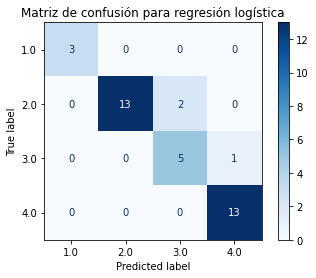

In [ ]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(log_reg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('Matriz de confusión para regresión logística')
plt.show(matrix)
plt.show()